In [16]:
library('dplyr')
library('ROCR')

In [2]:
res<-matrix(c(1,TRUE,0.73,0.61,
            2,TRUE,0.69,0.03,
            3,FALSE,0.44,0.68,
            4,FALSE,0.55,0.31,
            5,TRUE,0.67,0.45,
            6,TRUE,0.47,0.09,
            7,FALSE,0.08,0.38,
            8,FALSE,0.15,0.05,
            9,TRUE,0.45,0.01,
            10,FALSE,0.35,0.04),ncol=4,byrow=TRUE)
colnames(res)<-c("Instance","True_Class","PM1","PM2")

In [3]:
resdf<-as.data.frame(res)
resdf<-mutate(resdf,PM11=1-PM1,PM22=1-PM2)
resdf

Instance,True_Class,PM1,PM2,PM11,PM22
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.73,0.61,0.27,0.39
2,1,0.69,0.03,0.31,0.97
3,0,0.44,0.68,0.56,0.32
4,0,0.55,0.31,0.45,0.69
5,1,0.67,0.45,0.33,0.55
6,1,0.47,0.09,0.53,0.91
7,0,0.08,0.38,0.92,0.62
8,0,0.15,0.05,0.85,0.95
9,1,0.45,0.01,0.55,0.99


[1] 0.92
[1] 0.4


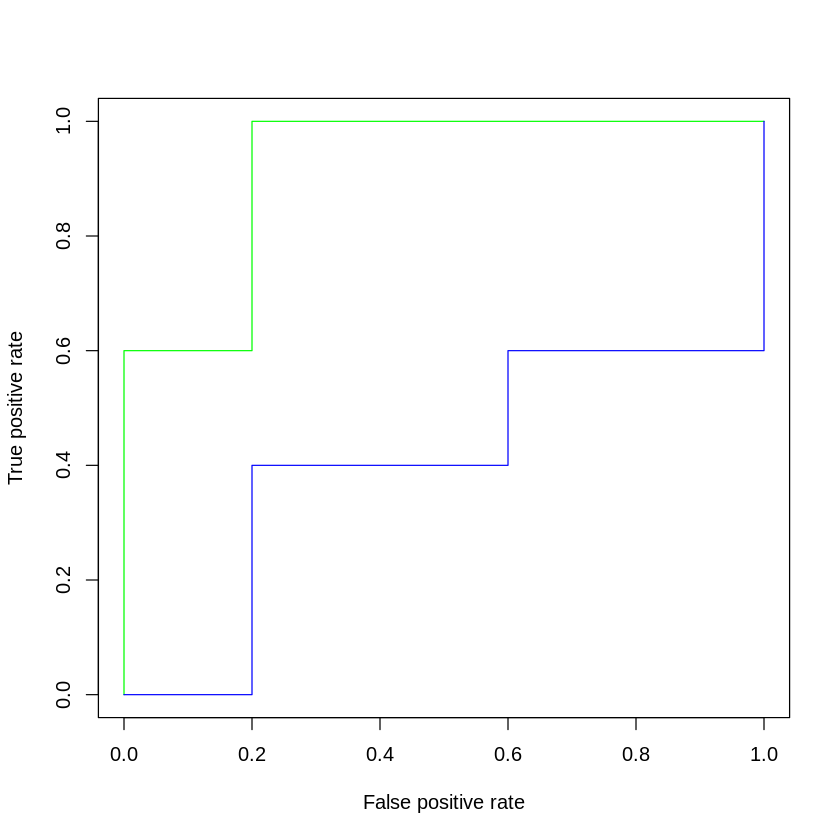

In [4]:
# i
eval1 <-prediction(resdf$PM1, resdf$True_Class)
eval2 <-prediction(resdf$PM2, resdf$True_Class)
plot(performance(eval1,"tpr","fpr"), col="green")
plot(performance(eval2,"tpr","fpr"),add=TRUE, col="blue")
print(attributes(performance(eval1,'auc'))$y.values[[1]])
print(attributes(performance(eval2,'auc'))$y.values[[1]])
# M1 > M2

In [5]:
# ii
df1<-resdf[order(-resdf$PM1),]
df1

,Instance,True_Class,PM1,PM2,PM11,PM22
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0.73,0.61,0.27,0.39
2,2,1,0.69,0.03,0.31,0.97
5,5,1,0.67,0.45,0.33,0.55
4,4,0,0.55,0.31,0.45,0.69
6,6,1,0.47,0.09,0.53,0.91
9,9,1,0.45,0.01,0.55,0.99
3,3,0,0.44,0.68,0.56,0.32
10,10,0,0.35,0.04,0.65,0.96
8,8,0,0.15,0.05,0.85,0.95


In [6]:
confusion_matrix<-table(truth=resdf$True_Class,prediction=resdf$PM1>0.5)
confusion_matrix

     prediction
truth FALSE TRUE
    0     4    1
    1     2    3

In [7]:
TN<-confusion_matrix[1,1] # TRUE NEGATIVE
TP<-confusion_matrix[2,2] # TRUE POSITIVE
FN<-confusion_matrix[2,1] # FALSE NEGATIVE
FP<-confusion_matrix[1,2] # FALSE POSITIVE

In [8]:
#ACCURACY
accuracy<-(TP+TN)/sum(confusion_matrix)
accuracy

[1] 0.7

In [9]:
#PRECISION
precision<-TP/(TP+FP)
precision
#RECALL
recall<-TP/(TP+FN)
recall

[1] 0.75

[1] 0.6

In [10]:
# F1 Score
f1_score<-(2*precision*recall)/(precision+recall)
f1_score

[1] 0.6666667

In [11]:
#iii
df2<-resdf[order(-resdf$PM2),]
df2

,Instance,True_Class,PM1,PM2,PM11,PM22
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,3,0,0.44,0.68,0.56,0.32
1,1,1,0.73,0.61,0.27,0.39
5,5,1,0.67,0.45,0.33,0.55
7,7,0,0.08,0.38,0.92,0.62
4,4,0,0.55,0.31,0.45,0.69
6,6,1,0.47,0.09,0.53,0.91
8,8,0,0.15,0.05,0.85,0.95
10,10,0,0.35,0.04,0.65,0.96
2,2,1,0.69,0.03,0.31,0.97


In [12]:
confusion_matrix2<-table(truth=resdf$True_Class,prediction=resdf$PM2>0.5)
confusion_matrix2

     prediction
truth FALSE TRUE
    0     4    1
    1     4    1

In [13]:
TN<-confusion_matrix2[1,1] # TRUE NEGATIVE
TP<-confusion_matrix2[2,2] # TRUE POSITIVE
FN<-confusion_matrix2[2,1] # FALSE NEGATIVE
FP<-confusion_matrix2[1,2] # FALSE POSITIVE
#ACCURACY
accuracy<-(TP+TN)/sum(confusion_matrix)
accuracy
#PRECISION
precision<-TP/(TP+FP)
precision
#RECALL
recall<-TP/(TP+FN)
recall
# F1 Score
f1_score<-(2*precision*recall)/(precision+recall)
f1_score

[1] 0.5

[1] 0.5

[1] 0.2

[1] 0.2857143

In [14]:
#iv
confusion_matrix3<-table(truth=resdf$True_Class,prediction=resdf$PM1>0.1)
confusion_matrix3

     prediction
truth FALSE TRUE
    0     1    4
    1     0    5

In [15]:
TN<-confusion_matrix3[1,1] # TRUE NEGATIVE
TP<-confusion_matrix3[2,2] # TRUE POSITIVE
FN<-confusion_matrix3[2,1] # FALSE NEGATIVE
FP<-confusion_matrix3[1,2] # FALSE POSITIVE
#ACCURACY
accuracy<-(TP+TN)/sum(confusion_matrix)
accuracy
#PRECISION
precision<-TP/(TP+FP)
precision
#RECALL
recall<-TP/(TP+FN)
recall
# F1 Score
f1_score<-(2*precision*recall)/(precision+recall)
f1_score

[1] 0.6

[1] 0.5555556

[1] 1

[1] 0.7142857